In [19]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Vectors

This notebook uses many images from the excellent [A Visual Intro to NumPy and Data Representation](https://jalammar.github.io/visual-numpy/) from [Jay Alammar](https://jalammar.github.io/).

## Axes

Axes == dimension

i.e. three axes == three dimensions

## Scalars, vectors, matricies and tensors

See Chapter 2 of [Deep Learning](https://www.deeplearningbook.org/).

Being specific about how we use these terms (there is no solid concensus - many people (including me) will use array and/or tensor).

### Scalar

$\textit{x}$

- single number
- lowercase, italic $\textit{x}$
- point

### Vector

$\textbf{x} = \begin{bmatrix}x_{1} \\ x_{2} \\ \vdots \\ x_{n} \end{bmatrix}$

- array of $n$ numbers
- lowercase, bold 
- $x_{1}$ = first element
- line

### Matrix

$\textbf{A}_{2, 2} = \begin{bmatrix}A_{1, 1} & A_{1, 2} \\ A_{2, 1} & A_{2, 2}\end{bmatrix}$

- two dimensional
- uppercase, bold $\textbf{A}_{m, n}$
- $A_{1, 1}$ = first element
- area

### Tensor

- n-dimensional
- 3 = volume
- uppercase, bold $\textbf{A}_{i,j,k}$

## When `numpy`

Linear algebra, non-tabular data processing, deep learning

## When *NOT* `numpy`
Tabular data, data analysis 

Pandas sits on top of `numpy`:

In [1]:
pd.DataFrame([1,2]).values

NameError: name 'pd' is not defined

## What is `numpy`

Library for working with n-dimensional data
- **store and operate on data using C structures**

<img src="assets/c.png" alt="" width="350"/>

## Why `numpy`

Functionality - There is nothing that cannot be done with python lists that can be done with numpy arrays. It is sometimes just nicer to use
- vector, matrix & tensor operations

Uses less memory
- fixed data types (can also be a drawback)

Speed
- fixed data types (benefit from static typing)
- C implementation

Below we implement a sum operation using a Python loop:

In [26]:
def loop(left, right):
    data = np.zeros(left.shape[0])
    for i in range(data.shape[0]):
        data[i] = left[i] + right[i]
    return data

left = np.arange(10000000)
right = np.arange(10000000)

#  excuse the horrbile hack here
#  want to always print the time in seconds
res = %timeit -qo loop(left, right)

'{:.2f} seconds'.format(res.average)

'6.45 seconds'

Now lets try it using `numpy` addition:

In [27]:
res = %timeit -qo left + right

'{:.2f} seconds'.format(res.average)

'0.03 seconds'

Numpy arrays also take way less storage compared to python lists, consider that example:

In [28]:
py_arr = [1,2,3,4,5,6] # Normal python list
numpy_arr = np.array([1,2,3,4,5,6]) # Numpy array 

sizeof_py_arr = sys.getsizeof(1) * len(py_arr)           # Calculating size for python list
sizeof_numpy_arr = numpy_arr.itemsize * numpy_arr.size   # Calculating size for numpy array

# Printing the ratio of python list to numpy array
print("Storage size of python lists is " + str(sizeof_py_arr / sizeof_numpy_arr) + " times bigger than numpy arrays")


Storage size of python lists is 3.5 times bigger than numpy arrays


Note that not only is `numpy` quicker, it is **more readable**!

The reason that `numpy` is faster is **vectorization**
- running multiple operations from a single instruction

Many CPU's have operation that run in parallel (modern x86 chips have the SSE instructions)

Vectorization is
- the process of rewriting a loop 
- instead of processing a single element of an array N times
- it processes 4 elements of the array simultaneously N/4 times

## `list` versus `np.array`

Python list
- general-purpose container - can hold different data types
- support (fairly) efficient insertion, deletion, appending, and concatenation
- list comprehensions make them easy to construct and manipulate
- only a few list operations can be carried out in C (because of the need for type checking)
- the list holds pointers to items scattered across memory

Numpy array
- **only one data type**
- less flexible
- vectorized operations
- fixed size
- data in one place in memory

Only holding one data type means that numpy can efficiently store data in memory

A list doesn't know what the next object will be - this makes storing it in memory challenging

```python
[0, 1.0, '2.0']
```

We can make an array from a list - `numpy` will make assumptions about what datatype the array should hold:

In [2]:
# the integer 10 is converted to a float
a = np.array([10,20.0,0])

In [3]:
a.dtype

dtype('float64')

In [5]:
a[0] = "3"

In [7]:
a

array([ 3., 20.,  0.])

We can see the data type by accessing the `.dtype` attribute:

In [8]:
a.dtype

dtype('float64')

We can change the datatype of an array:

In [9]:
np.array([10.0,20.0,1.0]).astype("int")

array([10, 20,  1])

Note that changing the datatype will by default create a newly allocated array (new location in memory) - you can control this using a an argument:

In [10]:
np.array([10.0,20.0,1.0], copy=False).astype("int")

array([10, 20,  1])

We can see the number of elements in an array:

In [11]:
np.array([10, 20, 1]).size

3

For a vector the size will be the same as the shape:

In [15]:
np.array([10, 20, 1]).shape

(3,)

We can also get the number of elements in a vector using the Python bulitin `len`:

In [16]:
np.array([10, 20, 1]).shape[0]

3

In [17]:
len(np.array([10, 20, 3])) # only 1-dimensional

3

## Vectors

$\begin{bmatrix}x_{1} & x_{2} & \cdots & x_{n} \end{bmatrix}$

- array of $n$ numbers
- lowercase, bold $\textbf{x}$
- $x_{1}$ = first element
- line

We can visualize a vector as a line:

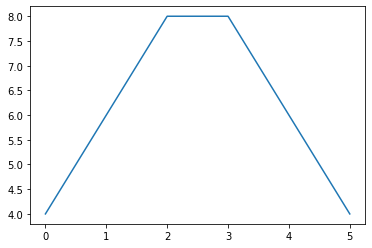

In [20]:
data = np.array([4, 6, 8, 8, 6, 4])
plt.plot(data)

## Vector Arithmetic

In Python when we add iterables together they are joined:

In [21]:
"Py" + "thon"

'Python'

In [24]:
[1,2,3] + [4]

[1, 2, 3, 4]

`numpy` works differently - addition works **element wise**:

<img src="assets/add.png" alt="" width="300"/>

In [28]:
np.array([0, 1]) + np.array([1, 2])

array([1, 3])

All of the logic above holds for subtraction, multiplication etc:

In [29]:
np.array([0, 1, 2]) - np.array([1])

array([-1,  0,  1])

In [31]:
np.array([0, 1, 2]) * np.array([1, 2, 2])

array([0, 2, 4])

Common problem to multiply every number of a list with a scalar represents way more work using lists compared to np arrays

In [34]:
array_1 = np.array([1,2,3]) # np array
list_1 = [1,2,3] # native python list

np_double = array_1 * 2
list_double = [(i*2)for i in list_1]
# same as:
list_double = []
for it in list_1:
    list_double.append(i*2)

In [36]:
np_double

array([2, 4, 6])

In [35]:
list_double

[2, 4, 6]

In [37]:
list_1 * 2 # duplicates list

[1, 2, 3, 1, 2, 3]

Next to vector summing, of course it is also possible to take the product

In [38]:
np.prod(array_1)

6

## Broadcasting

The smaller array will be broadcast across the larger array

<img src="assets/broad.png" alt="" width="300"/>

In [41]:
np.array([1, 2]) + np.array([1, 6])

array([ 1, 12])

Note how different adding lists together is:

In [40]:
[1, 2] + [1, 6]

[1, 2, 1, 6]

Broadcasting is important because the larger array **keep its shape**
- matrix multiplication (ie dot products) often result in differently shaped arrays

## Working in a single dimension

Vectors - flat lists

### Indexing

<img src="assets/idx.png" alt="" width="500"/>

### Aggregation

<img src="assets/agg.png" alt="" width="800"/>

## Practical 

Calculate the absolute difference between the sum of squared numbers between 1 and 100 and the square of their sum, once in pure python and with numpy arrays: 
$$ |(1^2 + 2^2 + 3^2 + ...) - (1 + 2 + 3 + ...)^2|$$ 


### Pure python:

In [65]:
abs(sum(range(0,101)) - sum(range(0,101))**2)
#abs(sum(range(0,101)) - sum(i**2 for i in range(0,101)**2))

25497450

In [67]:
array_1 = np.array(range(1,101))
array_2 = np.array(range(1,101))
abs(sum(array_1) - sum(array_2)**2)


25497450

In [ ]:
# pro answer Python
def pure_python_version():
    # making list of 100 numbers
    list100 = list(range(100 + 1))
    # taking sum of all numbers, then sqauring
    sum_squared = (sum(list100))**2
    # squaring all number then taking sum
    squared_sum = sum([i**2 for i in list100])
    list_answer = abs(squared_sum - sum_squared)
    return list_answer

### Numpy array

In [ ]:
# pro answer Numpy
def pure_python_version():
    array100 = np.array(100 + 1)
    sum_squared = np.sum(np.square(array))
    squared_sum = np.square(np.sum(array100))
    array_answer = abs(squared_sum - sum_squared)
    return array_answer
    

## Answers:
You are encouraged to look at the solutions after you gave it a serious try 

## Making vectors

`np.arange` - similar to the Python builtin `range`

In [68]:
np.arange(0, 10, 2)

array([0, 2, 4, 6, 8])

In [69]:
np.arange(start=0, stop=10, step=2)

array([0, 2, 4, 6, 8])

In [ ]:
np.arange(10)

`np.linspace` - evenly spaced between two points

In [71]:
np.linspace(0, 100, 15)

array([  0.        ,   7.14285714,  14.28571429,  21.42857143,
        28.57142857,  35.71428571,  42.85714286,  50.        ,
        57.14285714,  64.28571429,  71.42857143,  78.57142857,
        85.71428571,  92.85714286, 100.        ])

## Sampling random uniform

This can be done two ways
- `np.random.random`
- `np.random.rand`

Only difference is the shape argument is not a tuple
- saves writing the brackets

Sample uniformly across the interval [0, 1)

In [ ]:
# pass shape in as a tuple
np.random.random((2, 4))

In [74]:
np.random.rand(2,4)

array([[0.10508989, 0.33495237, 0.72944447, 0.37365152],
       [0.65889964, 0.63982296, 0.88310539, 0.86618975]])

## Sample from a standard normal

`np.random.randn`

$\mathcal{N}(0,1)$

In [76]:
np.random.randn(2,4)

array([[-0.68953372,  0.59755422, -0.20233158,  1.92377485],
       [ 0.77386906,  2.20355934, -0.84933446,  1.02870155]])

## Sample from a Gaussian

`np.random.normal`

$\mathcal{N}(\mu,\sigma)$

We choose the statistics (mean & standard deviation)

In [77]:
# mean, sd, size
np.random.normal(1, 2, size=(2,4))

array([[0.44433212, 1.8485791 , 3.22548997, 3.62722921],
       [0.86490344, 0.10969823, 1.18196253, 3.18243046]])

## Changing order of a numpy array
In case the order of the array is desired to be reversed, there are intuitive commands for that

In [81]:
my_array = np.matrix([[1, 2, 3, 4]])
np.fliplr(my_array)

matrix([[4, 3, 2, 1]])

# Practical: Finding the biggest product

In the 20×20 grid below, four numbers along a diagonal line have been marked in red.

<img src="assets/number.png" alt="" width="500"/>

The product of these numbers is 26 × 63 × 78 × 14 = 1788696.

What is the greatest product of four adjacent numbers in the same direction (up, down, left, right, or diagonally) in the 20×20 grid?

### Potential approach
1. Getting the numbers in a workable format - (from string to integers, in a list, etc)
2. Writing a loop to extract a 4x4 matrix of the grid
3. Writing a function to calculate all potential products

In [197]:
num = ("""08 02 22 97 38 15 00 40 00 75 04 05 07 78 52 12 50 77 91 08
49 49 99 40 17 81 18 57 60 87 17 40 98 43 69 48 04 56 62 00
81 49 31 73 55 79 14 29 93 71 40 67 53 88 30 03 49 13 36 65
52 70 95 23 04 60 11 42 69 24 68 56 01 32 56 71 37 02 36 91
22 31 16 71 51 67 63 89 41 92 36 54 22 40 40 28 66 33 13 80
24 47 32 60 99 03 45 02 44 75 33 53 78 36 84 20 35 17 12 50
32 98 81 28 64 23 67 10 26 38 40 67 59 54 70 66 18 38 64 70
67 26 20 68 02 62 12 20 95 63 94 39 63 08 40 91 66 49 94 21
24 55 58 05 66 73 99 26 97 17 78 78 96 83 14 88 34 89 63 72
21 36 23 09 75 00 76 44 20 45 35 14 00 61 33 97 34 31 33 95
78 17 53 28 22 75 31 67 15 94 03 80 04 62 16 14 09 53 56 92
16 39 05 42 96 35 31 47 55 58 88 24 00 17 54 24 36 29 85 57
86 56 00 48 35 71 89 07 05 44 44 37 44 60 21 58 51 54 17 58
19 80 81 68 05 94 47 69 28 73 92 13 86 52 17 77 04 89 55 40
04 52 08 83 97 35 99 16 07 97 57 32 16 26 26 79 33 27 98 66
88 36 68 87 57 62 20 72 03 46 33 67 46 55 12 32 63 93 53 69
04 42 16 73 38 25 39 11 24 94 72 18 08 46 29 32 40 62 76 36
20 69 36 41 72 30 23 88 34 62 99 69 82 67 59 85 74 04 36 16
20 73 35 29 78 31 90 01 74 31 49 71 48 86 81 16 23 57 05 54
01 70 54 71 83 51 54 69 16 92 33 48 61 43 52 01 89 19 67 48""".replace("\n", " "))

In [191]:
# clean and convert to array
# array_1 = [int(i) for i in num.replace(" ", ",").split(',')]


""" matrix_1[0,0,0] # i
matrix_1[0, 0,1] # x-wise
matrix_1[0,1,0] # y-wise
matrix_1[0, 1,1] # xy-wise
matrix_1[1, 1,1] # z-wise """

# test with a 3x3x3 matrix
matrix_1 = np.random.normal(1, 2, size=(3,3,3))

my_list = []
for i,j,z in matrix_1:
    n = np.where(i)
    print(n)
    #result = matrix_1[n,n,n+3] * matrix_1[n,n+3,n] * matrix_1[n,n+3,n+3] * matrix_1[n+3,n+3,n+3]
    #my_list.append(result)
#max(result)

(array([0, 1, 2]),)
(array([0, 1, 2]),)
(array([0, 1, 2]),)


## Answer:
Here you can check whether your results matches the solutions. You are encouraged to look at the code after you gave it a serious try

In [204]:
# initiating a function to create products of number
def list_product(digits, maximum):
        # Calculating the maximum of left, right, yp and down
        for i in range(digits.shape[0]):
            product = max(np.prod(digits[:,i]), # Horizontal
                          np.prod(digits[i,:]), # Vertical
                          np.prod(digits.diagonal()), # Diagonal
                          np.prod(np.fliplr(digits).diagonal()) # Reverse diagonal
                          )        
            # Checking whether its higher than the maximum
            if product > maximum:
                maximum = product

        return maximum

In [205]:
# length of # of rows
num_rows = 20
adjacent_numbers = 4
max_product = 0

# list out all of the numbers
list_num = num.split()

# initiate empty list
list_lists = []

# changing format from 1 big list to list of lists
for i in range(num_rows):
    start = (i) * 20 # because grid has 20 cols
    end = (i + 1) * 20
    row = list_num[start:end]
    list_lists.append(row)

# using numpy for easier slicing
list_lists = np.array(list_lists, dtype=int)

# getting 4x4 matrices out of big matrix
for i in range(num_rows - adjacent_numbers):
    # going column-wise
    start_i = i
    end_i = i + 4
    # going row-wise
    for j in range(num_rows - adjacent_numbers):
        start_j = j
        end_j = j + 4
        # applying the function for calculating prod to all 4x4 matrices
        max_product = list_product(list_lists[start_i:end_i, start_j:end_j],
            max_product)

print(max_product)

70600674
